<a href="https://colab.research.google.com/github/yfhkucing/latihan_dicoding/blob/master/NLP_Muhammad_Yusuf_Hidayat.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# tugas NLP Muhammad Yusuf Hidayat
# dataset yang digunakan :  https://www.kaggle.com/datasets/asad1m9a9h6mood/news-articles

In [6]:
!pip install kaggle
! mkdir ~/.kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [7]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [8]:
! kaggle datasets download asad1m9a9h6mood/news-articles

  0% 0.00/1.73M [00:00<?, ?B/s]
100% 1.73M/1.73M [00:00<00:00, 169MB/s]


In [9]:
! unzip /content/news-articles.zip

Archive:  /content/news-articles.zip
  inflating: Articles.csv            


In [15]:
#dataframe
import pandas as pd
df = pd.read_csv("/content/Articles.csv", encoding='cp1252')
df.pop('Date')
df.head()

,Article,Heading,NewsType
0,KARACHI: The Sindh government has decided to b...,sindh govt decides to cut public transport far...,business
1,HONG KONG: Asian markets started 2015 on an up...,asia stocks up in new year trad,business
2,HONG KONG: Hong Kong shares opened 0.66 perce...,hong kong stocks open 0.66 percent lower,business
3,HONG KONG: Asian markets tumbled Tuesday follo...,asian stocks sink euro near nine year,business
4,NEW YORK: US oil prices Monday slipped below $...,us oil prices slip below 50 a barr,business


In [96]:
# one hot encoding untuk label yang akan digunakan
df2 = pd.get_dummies(df['NewsType'])
df = df.join(df2)
df.head()

,Article,Heading,NewsType,business,sports
0,KARACHI: The Sindh government has decided to b...,sindh govt decides to cut public transport far...,business,1,0
1,HONG KONG: Asian markets started 2015 on an up...,asia stocks up in new year trad,business,1,0
2,HONG KONG: Hong Kong shares opened 0.66 perce...,hong kong stocks open 0.66 percent lower,business,1,0
3,HONG KONG: Asian markets tumbled Tuesday follo...,asian stocks sink euro near nine year,business,1,0
4,NEW YORK: US oil prices Monday slipped below $...,us oil prices slip below 50 a barr,business,1,0


In [66]:
#mengubah data menjadi array berisikan kalimat
df['Heading']=df['Heading'].astype(str)

heading = df['Heading'].tolist() 


In [67]:
#mengubah label menjadi array 
label = df[['business', 'sports']].values

In [68]:
len(label)

2692

In [21]:
label

array([[1, 0],
       [1, 0],
       [1, 0],
       ...,
       [1, 0],
       [1, 0],
       [1, 0]], dtype=uint8)

In [22]:
heading[3]

'asian stocks sink euro near nine year '

In [23]:
#library yang diimpor untuk membuat model
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [69]:
#variabel yang akan digunakan untuk tokenisasi, embedding, dan training

vocab_size = 3189
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 2074 #training size 80% dari total data
num_epochs = 30

In [70]:
#train test splitting
import numpy as np
training_sentences = np.array(heading[0:training_size])
testing_sentences = np.array(heading[training_size:])
training_labels = np.array(label[0:training_size])
testing_labels = np.array(label[training_size:])

In [86]:
#tokenisasi dan padding 
tokenizer = Tokenizer(oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, padding=padding_type, truncating=trunc_type)

In [72]:
len(word_index)

4145

In [73]:
#model yang dipakai
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(2, activation='softmax')
])

In [74]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [75]:
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
65/65 - 3s - loss: 0.6489 - accuracy: 0.5603 - val_loss: 0.7229 - val_accuracy: 0.8252 - 3s/epoch - 40ms/step
Epoch 2/30
65/65 - 0s - loss: 0.1117 - accuracy: 0.9634 - val_loss: 0.4306 - val_accuracy: 0.8964 - 390ms/epoch - 6ms/step
Epoch 3/30
65/65 - 0s - loss: 0.0204 - accuracy: 0.9942 - val_loss: 0.2992 - val_accuracy: 0.9223 - 376ms/epoch - 6ms/step
Epoch 4/30
65/65 - 0s - loss: 0.0044 - accuracy: 0.9981 - val_loss: 0.6012 - val_accuracy: 0.9256 - 408ms/epoch - 6ms/step
Epoch 5/30
65/65 - 0s - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.6248 - val_accuracy: 0.9272 - 373ms/epoch - 6ms/step
Epoch 6/30
65/65 - 0s - loss: 6.0401e-04 - accuracy: 1.0000 - val_loss: 1.0103 - val_accuracy: 0.9239 - 391ms/epoch - 6ms/step
Epoch 7/30
65/65 - 0s - loss: 8.1929e-05 - accuracy: 1.0000 - val_loss: 1.1410 - val_accuracy: 0.9256 - 376ms/epoch - 6ms/step
Epoch 8/30
65/65 - 0s - loss: 1.5775e-05 - accuracy: 1.0000 - val_loss: 1.1823 - val_accuracy: 0.9239 - 394ms/epoch - 6ms/step
Epoch 

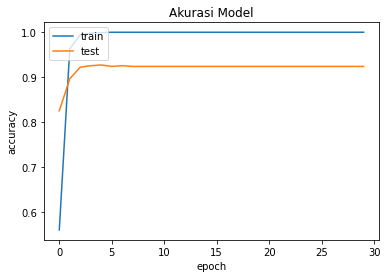

In [76]:
#accuracy

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [102]:
#test model yang sudah ditraining
test_sentence = [ "Is the small business surge in the US sustainable?",
    "Indian sports news wrap, October 10: Chennai Kaalpandhu League begins"]
sequence = tokenizer.texts_to_sequences(test_sentence)
sequence_padded = pad_sequences(sequence, padding=padding_type, truncating=trunc_type)

In [103]:
model.predict(sequence_padded)

array([[9.9990964e-01, 9.0337569e-05],
       [1.8069457e-05, 9.9998188e-01]], dtype=float32)